**Segmentação baseada em Clusters**

Utiliza aprendizado de máquina para realizar o agrupamento, a partir da similaridade entre os dados do dataset.

**Algoritmo k-means**

Deve-se definir a quantidade de grupos manualmente. Os centroídes separam os grupos, as posições dos centroídes no início são realizada de forma aleátoria. Então, é realizado o cálculo da distância entre os pontos e o centróide.

Os grupos são encontrados de forma automática, enquanto que na segmentação por região, as regiões são configuradas manualmente.

Este tipo de segmentação é semelhante a segmentação baseada em região, pois conforme aumenta-se o número de clusters, mais próximo fica-se da imagem original.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [18]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

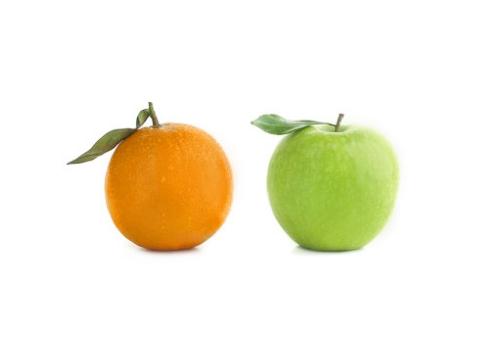

In [ ]:
img = cv2.imread('/content/imagens/frutas.jpg')
mostrar_imagem(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# Convertendo para um formato aceito pelo algoritmo do k-means
vetorizado = img.reshape((-1, 3)) 
vetorizado = np.float32(vetorizado)

In [ ]:
criterio_parada = (cv2.TERM_CRITERIA_EPS +      # Critério de parada
                   cv2.TERM_CRITERIA_MAX_ITER,  # Número de repetições a cada parada
                   10,  # O algoritmo irá parar com 10 iterações ou
                   1.0) # quando a acurácia for = 1

In [ ]:
ret, label, centros = cv2.kmeans(vetorizado, 3, # Número de clusters
                                 None,
                                 criterio_parada,
                                 10, # Número de vezes que o algoritmo será executado utilizando rótulos iniciais
                                 cv2.KMEANS_RANDOM_CENTERS
                                 )
# soma das distâncias quadradas de cada ponto ao seu centro, rótulos de cada pixel da imagem, vetor com os centróides 

In [ ]:
print(ret)
print()
print(np.unique(label))
print()
print(centros)

66691163.58572686

[0 1 2]

[[ 14.406983 133.79312  225.93048 ]
 [ 84.77781  190.10513  166.05893 ]
 [254.4694   255.06332  255.06282 ]]


In [ ]:
centros = np.uint8(centros)

In [ ]:
img_final = centros[label.flatten()] # Convertendo para a imagem
img_final = img_final.reshape(img.shape)

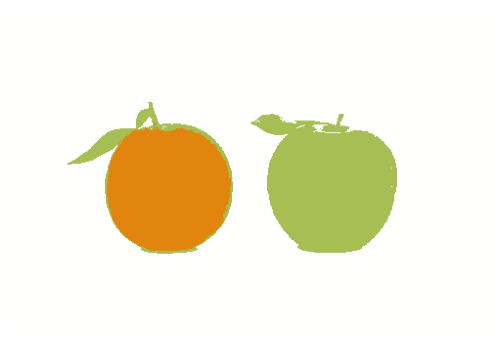

In [ ]:
mostrar_imagem(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))

In [23]:
def segmentacao_cluster(img, k):
  vetorizado = img.reshape((-1, 3)) 
  vetorizado = np.float32(vetorizado)

  criterio_parada = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,  1.0) 
  ret, label, centros = cv2.kmeans(vetorizado, k, None, criterio_parada, 10,  cv2.KMEANS_RANDOM_CENTERS)

  centros = np.uint8(centros)

  img_final = centros[label.flatten()] 
  img_final = img_final.reshape(img.shape)

  return img_final

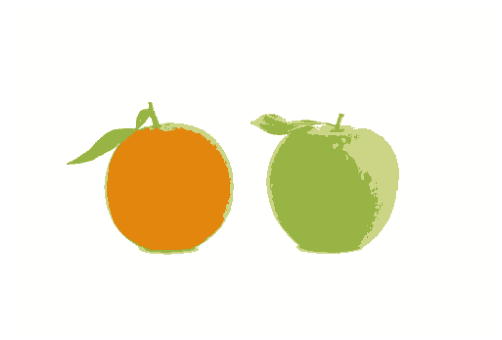

In [24]:
seg_cluster = segmentacao_cluster(img, 4)
mostrar_imagem(seg_cluster)

In [28]:
def segmentacao_clustering(img, nSeg):
  titulos = ['Imagem Original']
  imagens = [img]

  for k in range(2, nSeg + 1):
    titulo = 'k = ' + str(k)
    titulos.append(titulo)
    seg = segmentacao_cluster(img, k)
    imagens.append(seg)

  fig = plt.gcf()
  fig.set_size_inches(18, 12)

  for i in range(nSeg):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), 'gray')
    plt.title(titulos[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.1)
  
  plt.subplots_adjust(wspace = 0.05)
  plt.show()

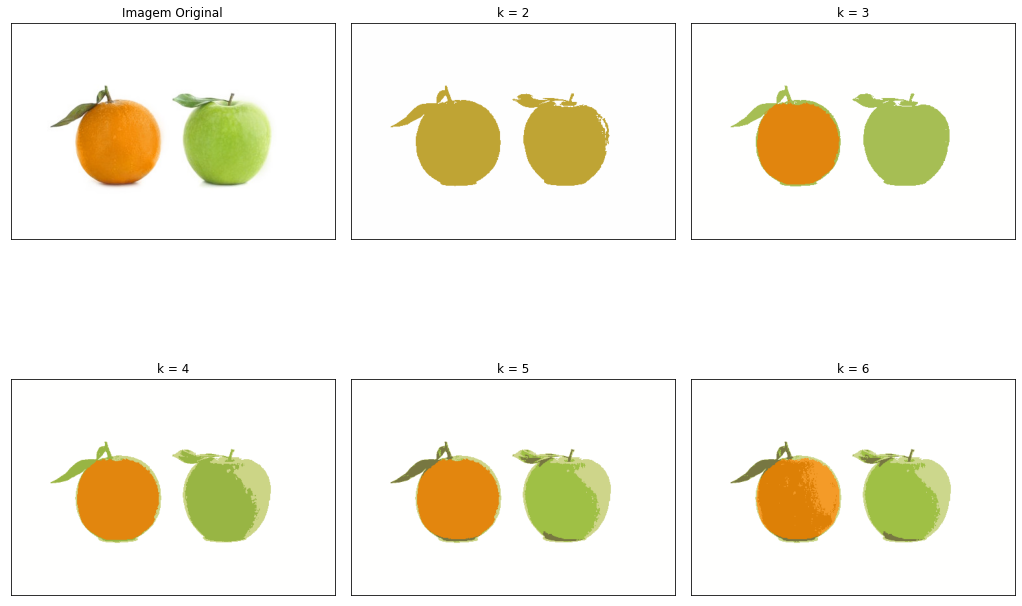

In [29]:
segmentacao_clustering(img, 6)

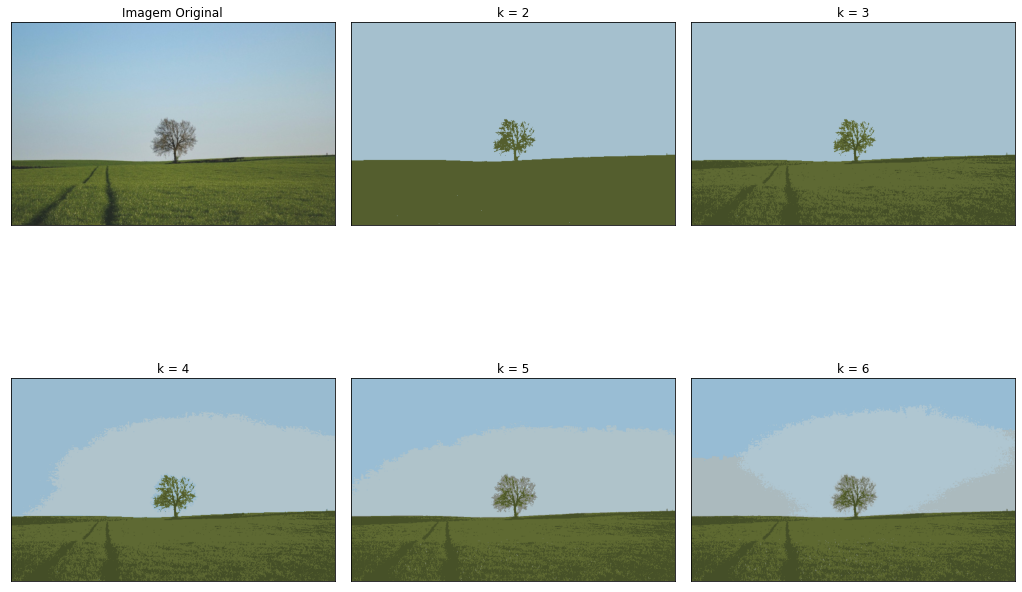

In [30]:
img = cv2.imread('/content/imagens/paisagem01.jpg')
segmentacao_clustering(img, 6)

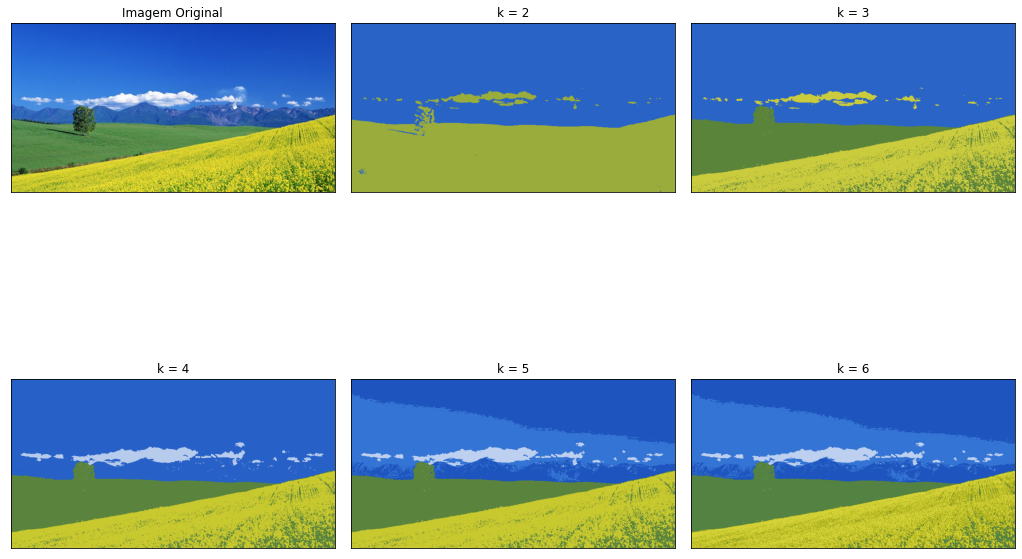

In [31]:
img = cv2.imread('/content/imagens/paisagem02.jpg')
segmentacao_clustering(img, 6)

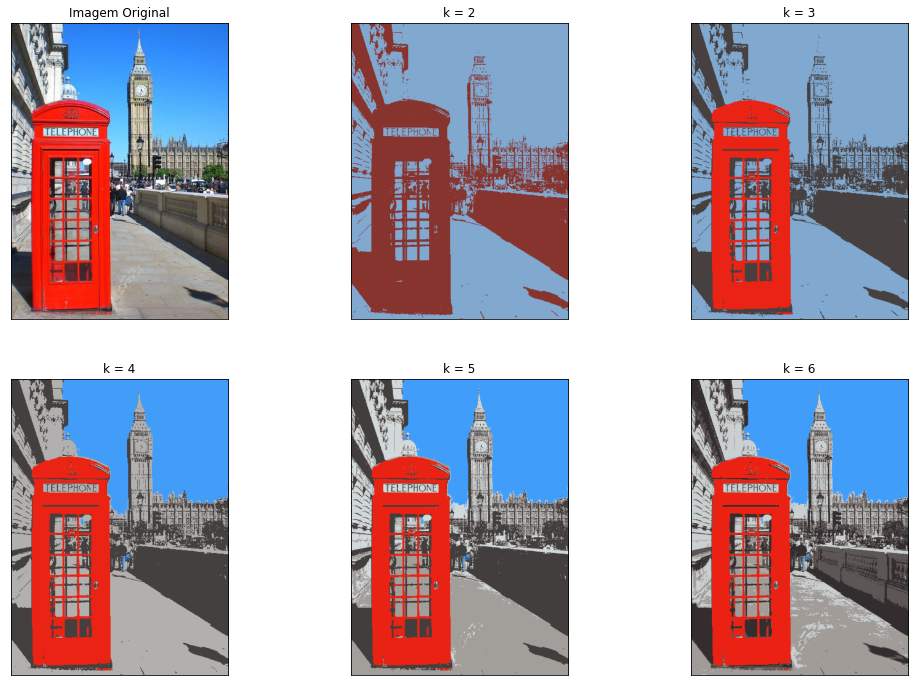

In [32]:
img = cv2.imread('/content/imagens/london-red-phonebox.jpg')
segmentacao_clustering(img, 6)

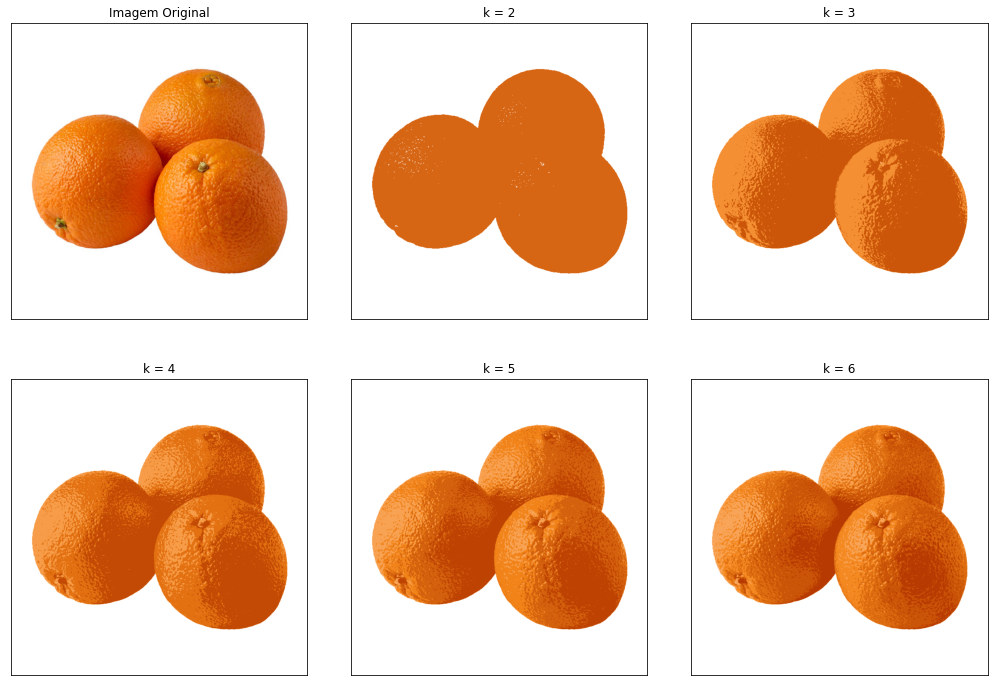

In [33]:
img = cv2.imread('/content/imagens/laranjas.jpg')
segmentacao_clustering(img, 6)